# Richter's Predictor: Modeling Earthquake Damage

Based on aspects of building location and construction, the goal is to predict the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal.

The data was collected through surveys by [Kathmandu Living Labs](http://www.kathmandulivinglabs.org) and the [Central Bureau of Statistics](https://cbs.gov.np), which works under the National Planning Commission Secretariat of Nepal. This survey is **one of the largest post-disaster datasets ever collected**, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

***
## Description of Features
***

The dataset mainly consists of information on the buildings' structure and their legal ownership. Each row in the dataset represents a specific building in the region that was hit by Gorkha earthquake.

There are 39 columns in this dataset, where the `building_id` column is a unique and random identifier. The remaining 38 features are described in the section below. Categorical variables have been obfuscated random lowercase ascii characters. The appearance of the same character in distinct columns does not imply the same original value.

**Description**

- `geo_level_1_id`, `geo_level_2_id`, `geo_level_3_id` (type: int): geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3). Possible values: level 1: 0-30, level 2: 0-1427, level 3: 0-12567.
- `count_floors_pre_eq` (type: int): number of floors in the building before the earthquake.
- `age` (type: int): age of the building in years.
- `area_percentage` (type: int): normalized area of the building footprint.
- `height_percentage` (type: int): normalized height of the building footprint.
- `land_surface_condition` (type: categorical): surface condition of the land where the building was built. Possible values: n, o, t.
- `foundation_type` (type: categorical): type of foundation used while building. Possible values: h, i, r, u, w.
- `roof_type` (type: categorical): type of roof used while building. Possible values: n, q, x.
- `ground_floor_type` (type: categorical): type of the ground floor. Possible values: f, m, v, x, z.
- `other_floor_type` (type: categorical): type of constructions used in higher than the ground floors (except of roof). Possible values: j, q, s, x.
- `position` (type: categorical): position of the building. Possible values: j, o, s, t.
- `plan_configuration` (type: categorical): building plan configuration. Possible values: a, c, d, f, m, n, o, q, s, u.
- `has_superstructure_adobe_mud` (type: binary): flag variable that indicates if the superstructure was made of Adobe/Mud.
- `has_superstructure_mud_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
- `has_superstructure_stone_flag` (type: binary): flag variable that indicates if the superstructure was made of Stone.
- `has_superstructure_cement_mortar_stone` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Stone.
- `has_superstructure_mud_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
- `has_superstructure_cement_mortar_brick` (type: binary): flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
- `has_superstructure_timber` (type: binary): flag variable that indicates if the superstructure was made of Timber.
- `has_superstructure_bamboo` (type: binary): flag variable that indicates if the superstructure was made of Bamboo.
- `has_superstructure_rc_non_engineered` (type: binary): flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
- `has_superstructure_rc_engineered` (type: binary): flag variable that indicates if the superstructure was made of engineered reinforced concrete.
- `has_superstructure_other` (type: binary): flag variable that indicates if the superstructure was made of any other material.
- `legal_ownership_status` (type: categorical): legal ownership status of the land where building was built. Possible values: a, r, v, w.
- `count_families` (type: int): number of families that live in the building.
- `has_secondary_use` (type: binary): flag variable that indicates if the building was used for any secondary purpose.
- `has_secondary_use_agriculture` (type: binary): flag variable that indicates if the building was used for agricultural purposes.
- `has_secondary_use_hotel` (type: binary): flag variable that indicates if the building was used as a hotel.
- `has_secondary_use_rental` (type: binary): flag variable that indicates if the building was used for rental purposes.
- `has_secondary_use_institution` (type: binary): flag variable that indicates if the building was used as a location of any institution.
- `has_secondary_use_school` (type: binary): flag variable that indicates if the building was used as a school.
- `has_secondary_use_industry` (type: binary): flag variable that indicates if the building was used for industrial purposes.
- `has_secondary_use_health_post` (type: binary): flag variable that indicates if the building was used as a health post.
- `has_secondary_use_gov_office` (type: binary): flag variable that indicates if the building was used fas a government office.
- `has_secondary_use_use_police` (type: binary): flag variable that indicates if the building was used as a police station.
- `has_secondary_use_other` (type: binary): flag variable that indicates if the building was secondarily used for other purposes.



Features have information on aspects of structure's location and construction. For instance, three distinct `geo_level_id`'s (1,2, and 3 respectively) represent the district, municipality/VDC and ward location of the surveyed structure. `foundation_type`, `roof_type`, `has_superstructure_mud`, and many others like these give us information on different aspects of the building's construction. Some features are continuous, for example age, height percentage, etc., but most are categorical. Among the categorical ones, most are dummies, some have a few categories encoded with strings, and a few like `geo_level_2_id` and `geo_level_3_id` have way too many categories (more than 100) inside them. These different cases need to be handled accordingly.

In some of the categorical varaibles, it is not clear what the encoded characters representing different levels of the categorical variable really mean in the physical context of the structure. We were able to find the original dataset from which the data for this competition has most likely been subsampled. From that, we have gotten some more information on what different levels in each category could possiblly mean; however, we have not yet fully worked out what the character-encoded levels in some of our categorical variables exactly mean in the physical context.

***
## Description of Labels
***

We're trying to predict the ordinal variable `damage_grade`, which represents a level of damage to the building that was hit by the earthquake. There are 3 grades of the damage:

- `1` represents low damage
- `2` represents a medium amount of damage
- `3` represents almost complete destruction

***
## Performance Metric
***

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. This can be viewed as a classification or an ordinal regression problem. (Ordinal regression is sometimes described as an problem somewhere in between classification and regression.)

To measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

$$F_{micro} = \frac{2 \cdot P_{micro} \cdot R_{micro}}{P_{micro} + R_{micro}}$$

where

$$P_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FP_{k})},~~R_{micro} = \frac{\sum_{k=1}^{3}TP_{k}}{\sum_{k=1}^{3}(TP_{k} + FN_{k})}$$

and *TP* is True Positive, *FP* is False Positive, *FN* is False Negative, and *k* represents each class in 1,2,3.

In Python, we can easily calculate this loss using `sklearn.metrics.f1_score` with the keyword argument `average='micro'`. Here are some references that discuss the micro-averaged F1 score further:

- [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)
- [Blog Post](http://rushdishams.blogspot.com/2011/08/micro-and-macro-average-of-precision.html)

In [1]:
import pandas as pd
import numpy as np
import os
import re

import string 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# ! pip install imbalanced-learn
import imblearn
# print(imblearn.__version__)
from imblearn.over_sampling import SMOTE

In [3]:
import sklearn

from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

import xgboost as xgb

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
# Load data set
train = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv'))

In [6]:
test = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv'))

In [7]:
labels = pd.read_csv(os.path.join('', 'Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv'))

In [8]:
labels.damage_grade.value_counts()/len(labels.damage_grade)

2    0.568912
3    0.334680
1    0.096408
Name: damage_grade, dtype: float64

**Remarks:**

- According to these results, we can say that there are 56.89% of the building suffered a medium amount of damage, 33.46% of the building were almost completely distructed and 9.64% of the building suffered a low damage.

- Class "low damage" is imbalanced, and might need upsampling. Another option to deal with the imbalance is to choose an appropriate metric, like F1 score or AUC.

In [9]:
train.dtypes.value_counts()

int64     31
object     8
dtype: int64

In [10]:
print('Object data types:\n')
#we'll use the function later, without wanting to print anything
def get_obj(train, p = False):
    obj_types = []
    for column in train.columns:
        if train[column].dtype == 'object': 
            if p: print(column)
            obj_types.append(column)
    return obj_types

Object data types:



In [11]:
obj_types = get_obj(train, True)

land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
legal_ownership_status


In [12]:
def transform_to_int(train, obj_types):
    #Assign dictionaries with current values and replacements for each column
    d_lsc = {'n':0, 'o':1, 't':2}
    d_ft = {'h':0, 'i':1, 'r':2, 'u':3, 'w':4}
    d_rt = {'n':0, 'q':1, 'x':2}
    d_gft = {'f':0, 'm':1, 'v':2, 'x':3, 'z':4}
    d_oft = {'j':0, 'q':1, 's':2, 'x':3}
    d_pos = {'j':0, 'o':1, 's':2, 't':3}
    d_pc = {'a':0, 'c':1, 'd':2, 'f':3, 'm':4, 'n':5, 'o':6, 'q':7, 's':8, 'u':9}
    d_los = {'a':0, 'r':1, 'v':2, 'w':3}
    #Each positional index in replacements corresponds to the column in obj_types
    replacements = [d_lsc, d_ft, d_rt, d_gft, d_oft, d_pos, d_pc, d_los]

    #Replace using lambda Series.map(lambda)
    for i,col in enumerate(obj_types):
        train[col] = train[col].map(lambda a: replacements[i][a]).astype('int64')

In [13]:
transform_to_int(train, obj_types)

In [14]:
train.dtypes.value_counts()

int64    39
dtype: int64

In [15]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,2,2,0,0,1,3,2,1,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,1,2,0,3,1,2,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,2,2,0,0,3,3,2,0,1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,2,2,0,0,3,2,2,0,1,0,0,0,0,1,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,2,2,0,0,3,2,2,1,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0


***
**Data Splitting**
***

In [16]:
y = labels.pop('damage_grade')  
x = train.drop(["building_id"],axis=1)

In [17]:
print('Original dataset shape:', x.shape)
print('Original labelset shape:', y.shape)

Original dataset shape: (260601, 38)
Original labelset shape: (260601,)


In [18]:
# keep the same random state for reproducibility
RANDOM_STATE = 12
TRAIN_TEST_SPLIT_SIZE = .1

In [19]:
# stratify on damage_grade
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = TRAIN_TEST_SPLIT_SIZE, 
                                                    stratify = y,
                                                    random_state = RANDOM_STATE)

In [20]:
# transform the training dataset only
sm = SMOTE(random_state = RANDOM_STATE)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

In [21]:
print('Training dataset shape:', x_train.shape)
print('Training labelset shape:', y_train.shape)

Training dataset shape: (234540, 38)
Training labelset shape: (234540,)


In [22]:
print('Test labelset shape:', y_test.shape)
print('Test dataset shape:', x_test.shape)

Test labelset shape: (26061,)
Test dataset shape: (26061, 38)


In [23]:
print('Resampled training dataset shape:', x_train_sm.shape)
print('Resampled training labelset shape:', y_train_sm.shape)

Resampled training dataset shape: (400299, 38)
Resampled training labelset shape: (400299,)


In [24]:
# Saving feature names for later use
feature_names = list(x_train.columns)

Scaling is done to Normalize data so that priority is not given to a particular feature. the role of scaling is mostly important in algorithms that are distance based and require Euclidean Distance.

Random Forest is a tree-based model and hence does not require feature scaling.

***
**Functions**
***

In [25]:
# setup color scheme and standard figure size for all figures
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [26]:
def plot_cfm(labels, predictions, p = 0.5):
    cfm = metrics.confusion_matrix(labels, predictions > p)
    plt.figure(figsize = (5,5))
    sns.heatmap(cfm, annot = True, fmt = "d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')

    print('True Negatives: ', cfm[0][0])
    print('False Positives: ', cfm[0][1])
    print('False Negatives: ', cfm[1][0])
    print('True Positives: ', cfm[1][1])

In [27]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)
    roc_auc = metrics.auc(fp, tp)    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fp, tp, label = name + ' AUC = %0.2f' % roc_auc, linewidth=2, **kwargs)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linewidth=2, color=colors[6], linestyle=':')
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

In [28]:
def check_model_and_test(x_train, y_train, x_test, y_test, classifiers):
    for model in classifiers:
        this_model = model.__class__.__name__ #get the name of the classifier
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        
        print(f'{this_model} f1 score:')
        score = f1_score(y_test, y_pred, average='micro')
        print(f'{score:.4f}')
        print('\n')

***
**Models**
***

In [29]:
classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()]

In [30]:
check_model_and_test(x_train, y_train, x_test, y_test, classifiers)

KNeighborsClassifier f1 score:
0.7058


DecisionTreeClassifier f1 score:
0.6555


RandomForestClassifier f1 score:
0.7210


AdaBoostClassifier f1 score:
0.6425


GradientBoostingClassifier f1 score:
0.6770




***
**Experiment Plan**
***

Looks like RandomForest performs pretty well and gives a decent f1 score. For the next part, let's focus on trying to find out whether upsampling the imbalanced class will help to increase the dataset prediction or not. 

In [31]:
check_model_and_test(x_train_sm, y_train_sm, x_test, y_test, classifiers)

KNeighborsClassifier f1 score:
0.6669


DecisionTreeClassifier f1 score:
0.6422


RandomForestClassifier f1 score:
0.7040


AdaBoostClassifier f1 score:
0.5662


GradientBoostingClassifier f1 score:
0.6265




So far it looks like upsampling using SMOTE does not improve the prediction score, on the contrary, all classifiers consistently score lower. I'll try to run a couple of experiments later on, when after hyperparameter optimization to see if this changes. 

***
**Random Forest**
***
Random Forest is an ensemble bagging model. It creates a set of decision trees from randomly selected subset of training set and then aggregates the votes from different decision trees to decide the final class of the test object. In that way, random forest will get lower variance compared to decision tree because the decision tree is more sensitive to specific data and only one single decision tree is built. Moreover, random forest will get less overfit issues even when the number of trees is increased. 

In [32]:
rf_clf = RandomForestClassifier()

rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)

(array([0.5, 1.5, 2.5]), <a list of 3 Text major ticklabel objects>)

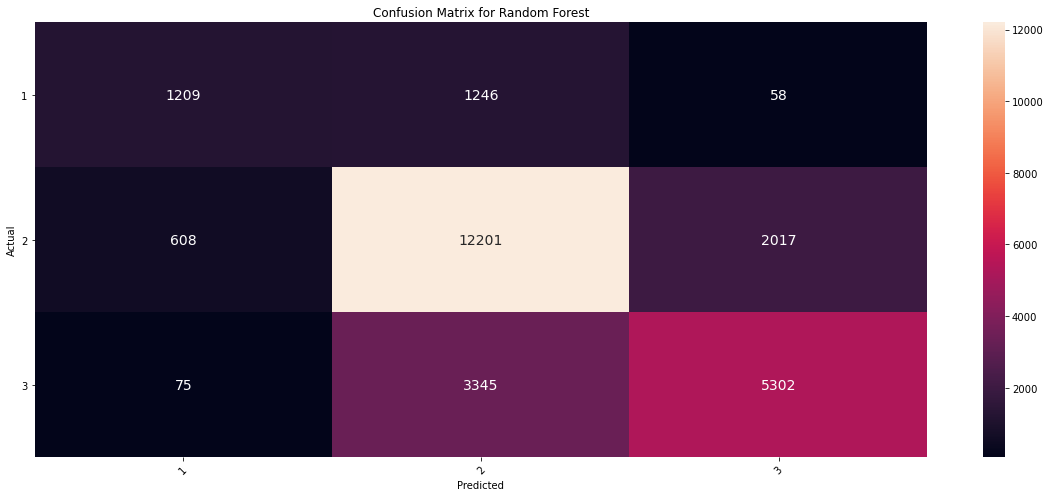

In [33]:
df_cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred_rf), columns=np.unique(y_test), index = np.unique(y_test))
df_cm_rf.index.name = 'Actual'
df_cm_rf.columns.name = 'Predicted'

plt.figure(figsize=(20,8))

# plt.subplot(1,2,1)
sns.heatmap(df_cm_rf, annot=True, fmt='d', annot_kws={"size": 14})
plt.title("Confusion Matrix for Random Forest")
plt.xticks(rotation=45)
plt.yticks(rotation=360)

We are doing decently on classifying label 2 accurately, but we are misclassiflying a big fraction of the other two labels. Label 2 refers to damage level 2, and almost 60% of the data are damage level 2 structures. Class imbalance seems to be causing some problem, but as we mentioned before, we tried using 'balanced' class weights to address class imbalance, but that hurt rather than helped our model performance.

Let's look at the classification report.

In [34]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.64      0.48      0.55      2513
           2       0.73      0.82      0.77     14826
           3       0.72      0.61      0.66      8722

    accuracy                           0.72     26061
   macro avg       0.69      0.64      0.66     26061
weighted avg       0.72      0.72      0.71     26061



These classification reports show that the prediction for `damage_grade` = 1 isn't really good, which can appear as a predictable result, looking at the `damage_grade` distribution.

In [35]:
importance_rf = pd.DataFrame({"Features":x.columns, "Importance_RF":rf_clf.feature_importances_}).sort_values(by='Importance_RF', ascending = False).head(15)
# importance_xgb = pd.DataFrame({"Features":x.columns, "Importance_XGB":xgb_clf.feature_importances_}).sort_values(by='Importance_XGB', ascending = False).head(15)

RF_styler = importance_rf.style.set_table_attributes("style='display:inline'").set_caption('Top 15 Random Forest importance')
# XGB_styler = importance_xgb.style.set_table_attributes("style='display:inline'").set_caption('Top 15 XGBoost importance')
from IPython.display import display_html 
display_html(RF_styler._repr_html_(), raw=True)
# + XGB_styler._repr_html_(), raw=True)

,Features,Importance_RF
2,geo_level_3_id,0.155037
0,geo_level_1_id,0.137688
1,geo_level_2_id,0.135780
4,age,0.122186
5,area_percentage,0.111909
6,height_percentage,0.055454
26,count_families,0.025375
9,roof_type,0.024724
8,foundation_type,0.024267
12,position,0.021810


The next steps would be to concentrate on Random Forest and other Boosting an Bagging algorithm like XGBoost or CatBoost:
- how to improve these results by tuning the hyperparameters.
- trying to find out whether more feature engineering, removing outliers, and PCA transformation will help to increase the dataset prediction or not. 

Machine learning still suffers from a black box problem, and one image is not going to solve the issue! Nonetheless, looking at an individual decision tree shows us this model (and a random forest) is not an unexplainable method, but a sequence of logical questions and answers — much as we would form when making predictions. 